In [1]:
import pandas as pd
import numpy as np

# Loading Training and Testing datasets
train = pd.read_csv(r'C:\Users\sudha\Documents\engr-ALDA-fall2021-H12\HW2\data\pca_train.csv')
test = pd.read_csv(r'C:\Users\sudha\Documents\engr-ALDA-fall2021-H12\HW2\data\pca_test.csv')
train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [2]:
print('Shape of training and testing datasets',train.shape, test.shape)
print('Size of training and testing datasets',train.size, test.size)

print('Class 0 samples in Training set')
print(len(train[train['Class'] == 0]))
print('Class 1 samples in Training Set')
print(len(train[train['Class'] == 1]))

print('Number of Class 0 samples in Testing set', len(test[test['Class'] == 0]))
print('Number of Class 1 samples in Testing Set', len(test[test['Class'] == 1]))

Shape of training and testing datasets (500, 31) (69, 31)
Size of training and testing datasets 15500 2139
Class 0 samples in Training set
195
Class 1 samples in Training Set
305
Number of Class 0 samples in Testing set 17
Number of Class 1 samples in Testing Set 52


In [3]:
columns = train.columns[:-1]
y_train = train['Class']
y_test =  test['Class']

In [4]:
# Normalizing Training and Testing data sets
from sklearn import preprocessing
import pandas as pd

for c in columns:
  max = train[c].max()
  min = train[c].min()
  test[c] = test[c].apply(lambda x: (x-min)/(max-min))
  train[c] = train[c].apply(lambda x: (x-min)/(max-min))

train = train[columns]
test = test[columns]
train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.680010,0.792037,0.703140,0.731113,0.668446,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.270471,0.181768,0.203608,0.348757,0.344367,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.572941,0.431017,0.462512,0.635686,0.481580,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.973233,0.811361,0.565604,0.522863,0.763481,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.459788,0.347893,0.463918,0.518390,0.342766,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [5]:
def covar(x):
    #Calculating covariance matrix of the training dataset
    return x.cov()
    # DDOF = 0 gives us the population covariance
    
cov_train = covar(train)
cov_test = covar(test)
print('Dimensions of the Training covariance matrix is', cov_train.shape)
print("First 5 rows and columns of the covariance matrix")
cov_train[cov_train.columns[:5]].head(5)

Dimensions of the Training covariance matrix is (30, 30)
First 5 rows and columns of the covariance matrix


,mean radius,mean texture,mean perimeter,mean area,mean smoothness
mean radius,0.027077,0.008405,0.027210,0.024075,0.005141
mean texture,0.008405,0.019838,0.008600,0.007431,0.000820
mean perimeter,0.027210,0.008600,0.027468,0.024227,0.006230
mean area,0.024075,0.007431,0.024227,0.021960,0.004855
mean smoothness,0.005141,0.000820,0.006230,0.004855,0.027648


In [6]:
from numpy.linalg import eig

eigenvalues, eigenvectors = eig(cov_train)
print("Size of covariance matrix is ", cov_train.size)
print("5 Largest eigenvalues are ")
print(sorted(eigenvalues, reverse=True)[:5])

Size of covariance matrix is  900
5 Largest eigenvalues are 
[0.33733653360325927, 0.10948734766697911, 0.042694138590695034, 0.040675517830797106, 0.029715515470093594]


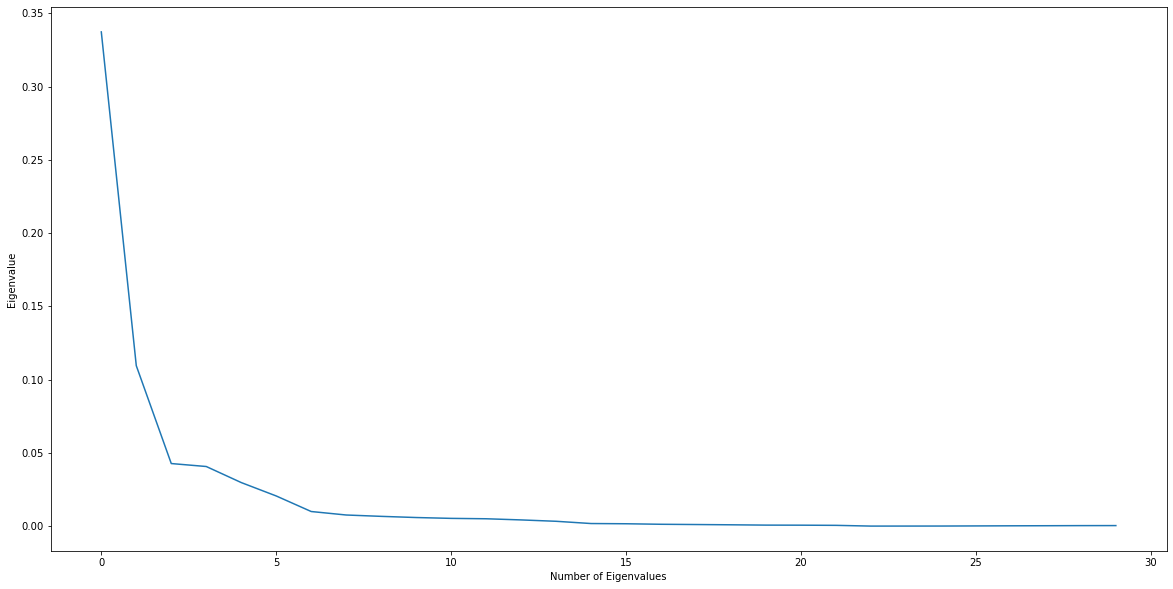

In [7]:
import matplotlib.pyplot as plt
def plot_eigen(eigen_matrix):
    fig = plt.figure()
    fig.set_figwidth(20)
    fig.set_figheight(10)
    plt.xlabel('Number of Eigenvalues')
    plt.ylabel('Eigenvalue')
    plt.plot(eigenvalues)
    plt.show()

plot_eigen(train)

In [8]:
# Determing the percentage of variance accounted for by each of the first 30 components
df = pd.DataFrame(columns, columns=['Attribute'])
df['eigenvalues'] = eigenvalues

df['eigen percentage'] = df['eigenvalues']/sum(df['eigenvalues'])
df['cummulative eigenvalue percent'] = np.cumsum(df['eigen percentage'])

df

,Attribute,eigenvalues,eigen percentage,cummulative eigenvalue percent
0,mean radius,0.337337,0.528804,0.528804
1,mean texture,0.109487,0.171631,0.700435
2,mean perimeter,0.042694,0.066927,0.767362
3,mean area,0.040676,0.063762,0.831124
4,mean smoothness,0.029716,0.046582,0.877706
5,mean compactness,0.020569,0.032244,0.909950
6,mean concavity,0.009954,0.015603,0.925553
7,mean concave points,0.007573,0.011872,0.937425
8,mean symmetry,0.006650,0.010424,0.947849
9,mean fractal dimension,0.005849,0.009169,0.957019


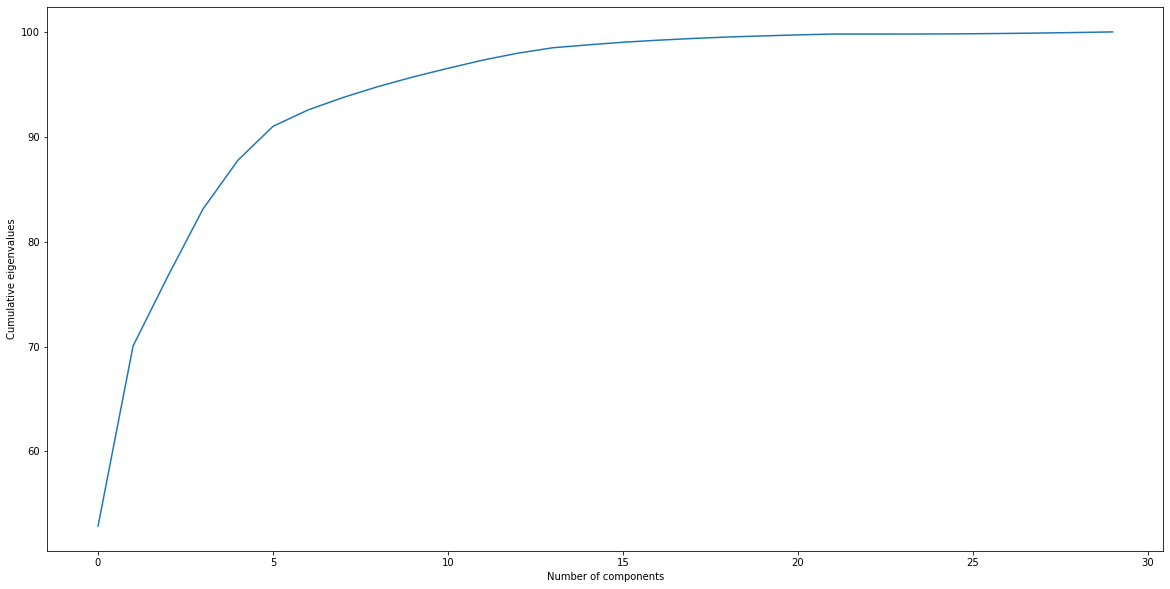

In [9]:
plt.figure(figsize=(20,10))
plt.plot(range(len(eigenvalues)), df['cummulative eigenvalue percent'] * 100)
plt.xlabel("Number of components")
plt.ylabel("Cumulative eigenvalues")
plt.show()

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

p_values = [2,4,8,10,20,25,30]
accuracy_list = []
for p in p_values:
  pca_train = train.dot(eigenvectors[:,:p])
  pca_test = test.dot(eigenvectors[:,:p])
  knn = KNeighborsClassifier(5).fit(pca_train, y_train)
  y_pred = knn.predict(pca_test)
  accuracy_list.append(accuracy_score(y_test, y_pred))
  if p == 10:
    test_report = pca_test
    test_report.columns = test.columns[:10]
    test_report['Ground Truth Output'] = y_test
    test_report['Actual Output'] = y_pred
    test_report.to_csv(r'test_output_norm.csv', index = False)
  print("Accuracy of KNN when p = ", p, "->", accuracy_list[len(accuracy_list) - 1])

Accuracy of KNN when p =  2 -> 0.9565217391304348
Accuracy of KNN when p =  4 -> 0.9420289855072463
Accuracy of KNN when p =  8 -> 0.9710144927536232
Accuracy of KNN when p =  10 -> 0.9855072463768116
Accuracy of KNN when p =  20 -> 0.9710144927536232
Accuracy of KNN when p =  25 -> 0.9855072463768116
Accuracy of KNN when p =  30 -> 0.9855072463768116


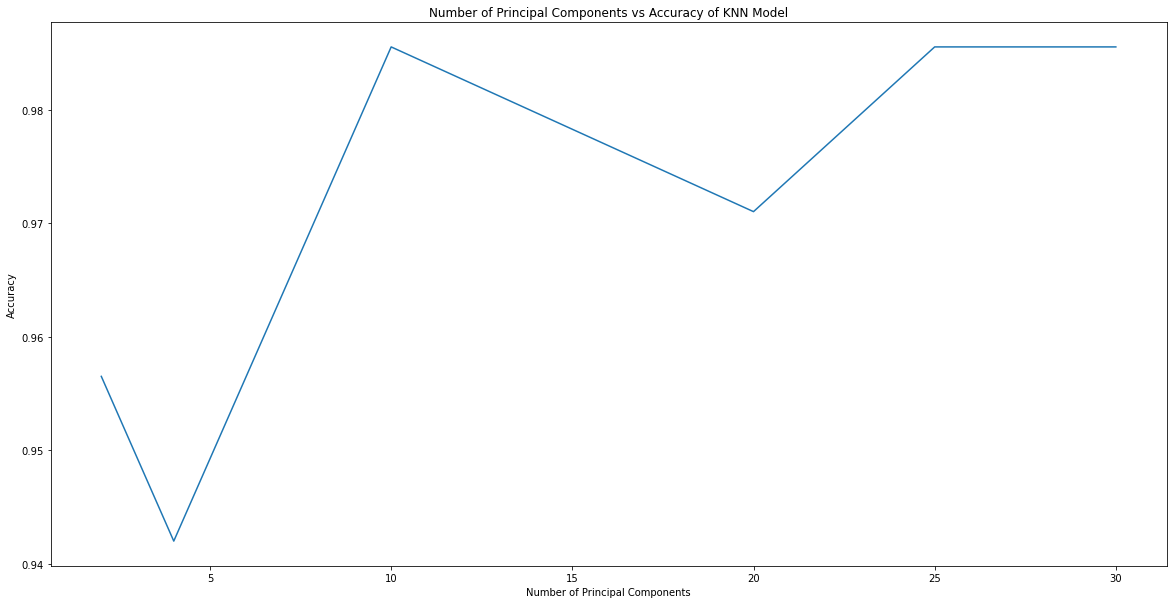

In [11]:
# Plotting Number of Principal Components vs Accuracy of the KNN Model
plt.figure(figsize=(20,10))
plt.plot(p_values, accuracy_list)
plt.ylabel("Accuracy")
plt.xlabel("Number of Principal Components")
plt.title("Number of Principal Components vs Accuracy of KNN Model")
plt.show()

In [12]:
# Performing Standardization of the data
train = pd.read_csv(r'C:\Users\sudha\Documents\engr-ALDA-fall2021-H12\HW2\data\pca_train.csv')
test = pd.read_csv(r'C:\Users\sudha\Documents\engr-ALDA-fall2021-H12\HW2\data\pca_test.csv')

y_train = train['Class']
y_test = test['Class']

In [13]:
for c in columns:
  mean = train[c].mean()
  std = np.std(train[c])
  test[c] = test[c].apply(lambda x: (x-mean)/std)
  train[c] = train[c].apply(lambda x: (x-mean)/std)

train = train[columns]
test = test[columns]
train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.084203,-2.092526,1.260185,0.968905,1.642284,3.273826,2.621146,2.514512,2.186130,2.363520,...,1.865613,-1.350241,2.293964,1.968433,1.330656,2.574258,2.085599,2.269775,2.652150,1.941562
1,1.827006,-0.316372,1.681730,1.900116,-0.823159,-0.477121,-0.037927,0.533630,-0.006140,-0.849484,...,1.784391,-0.346455,1.518709,1.858004,-0.359748,-0.438552,-0.166761,1.063643,-0.271900,0.289785
2,1.573646,0.520031,1.560692,1.547688,0.997724,1.054855,1.340251,2.020129,0.922053,-0.365492,...,1.488659,0.003550,1.329402,1.425052,0.547083,1.057790,0.833224,1.929506,1.091393,0.210181
3,-0.807354,0.310930,-0.627168,-0.792948,3.407500,3.392599,1.889028,1.435623,2.829003,5.093991,...,-0.314888,0.163693,-0.282106,-0.575463,3.426052,3.836620,1.965869,2.149769,5.870027,4.932229
4,1.746391,-1.140757,1.773552,1.817023,0.316541,0.543945,1.347734,1.412449,-0.016975,-0.534598,...,1.274150,-1.459205,1.320388,1.190172,0.238937,-0.322820,0.591848,0.706665,-0.881670,-0.386846


In [14]:
def covar(x):
    #Calculating covariance matrix of the training dataset
    return x.cov()
    # DDOF = 0 gives us the population covariance
    
cov_train = covar(train)
cov_test = covar(test)
print('Dimensions of the Training covariance matrix is', cov_train.shape)
print("Size of covariance matrix is ", cov_train.size)
print("First 5 rows and columns of the covariance matrix")
cov_train[cov_train.columns[:5]].head(5)

Dimensions of the Training covariance matrix is (30, 30)
Size of covariance matrix is  900
First 5 rows and columns of the covariance matrix


,mean radius,mean texture,mean perimeter,mean area,mean smoothness
mean radius,1.002004,0.363397,0.999721,0.989285,0.188257
mean texture,0.363397,1.002004,0.369175,0.356759,0.035088
mean perimeter,0.999721,0.369175,1.002004,0.988419,0.226526
mean area,0.989285,0.356759,0.988419,1.002004,0.197441
mean smoothness,0.188257,0.035088,0.226526,0.197441,1.002004


In [15]:
eigenvalues, eigenvectors = eig(cov_train)

print("5 Largest eigenvalues are ")
print(sorted(eigenvalues, reverse=True)[:5])

5 Largest eigenvalues are 
[13.400893341197813, 5.611013096749738, 2.909586997775059, 1.886002187726592, 1.6722277817686924]


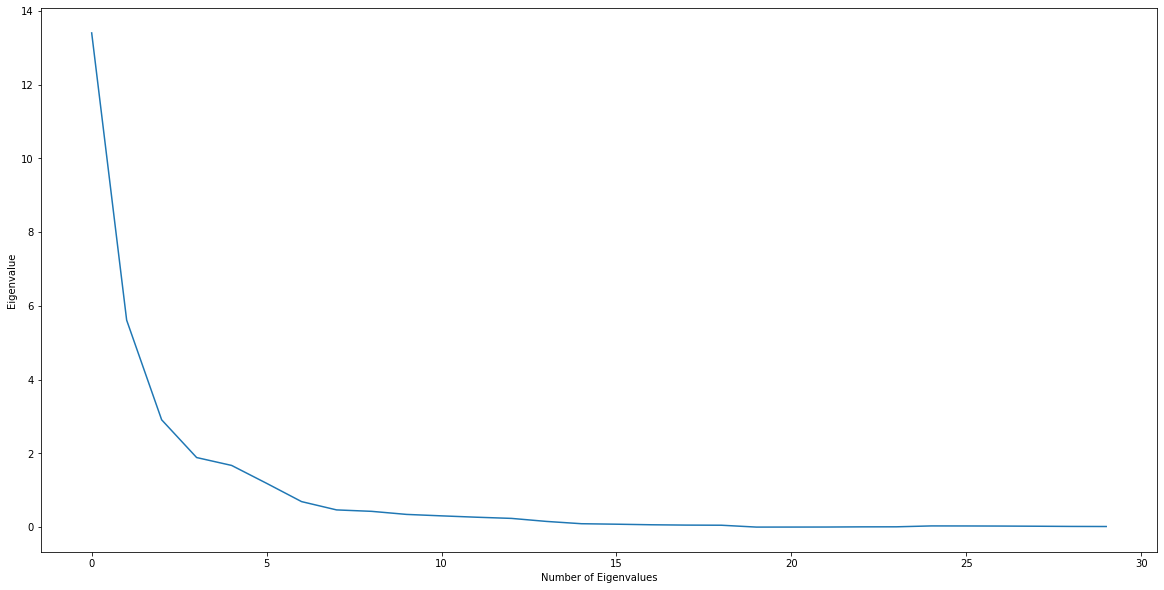

In [16]:
import matplotlib.pyplot as plt
def plot_eigen(eigen_matrix):
    fig = plt.figure()
    fig.set_figwidth(20)
    fig.set_figheight(10)
    plt.xlabel('Number of Eigenvalues')
    plt.ylabel('Eigenvalue')
    plt.plot(eigenvalues)
    plt.show()

plot_eigen(train)

In [17]:
# Determing the percentage of variance accounted for by each of the first 30 components
df = pd.DataFrame(columns, columns=['Attribute'])

df['eigenvalues'] = eigenvalues

df['eigen percentage'] = df['eigenvalues']/sum(df['eigenvalues'])
df['cummulative eigenvalue percent'] = np.cumsum(df['eigen percentage'])

df

,Attribute,eigenvalues,eigen percentage,cummulative eigenvalue percent
0,mean radius,13.400893,0.445803,0.445803
1,mean texture,5.611013,0.186660,0.632463
2,mean perimeter,2.909587,0.096792,0.729255
3,mean area,1.886002,0.062741,0.791996
4,mean smoothness,1.672228,0.055629,0.847625
5,mean compactness,1.187135,0.039492,0.887117
6,mean concavity,0.690844,0.022982,0.910100
7,mean concave points,0.466141,0.015507,0.925607
8,mean symmetry,0.427293,0.014215,0.939821
9,mean fractal dimension,0.344078,0.011446,0.951267


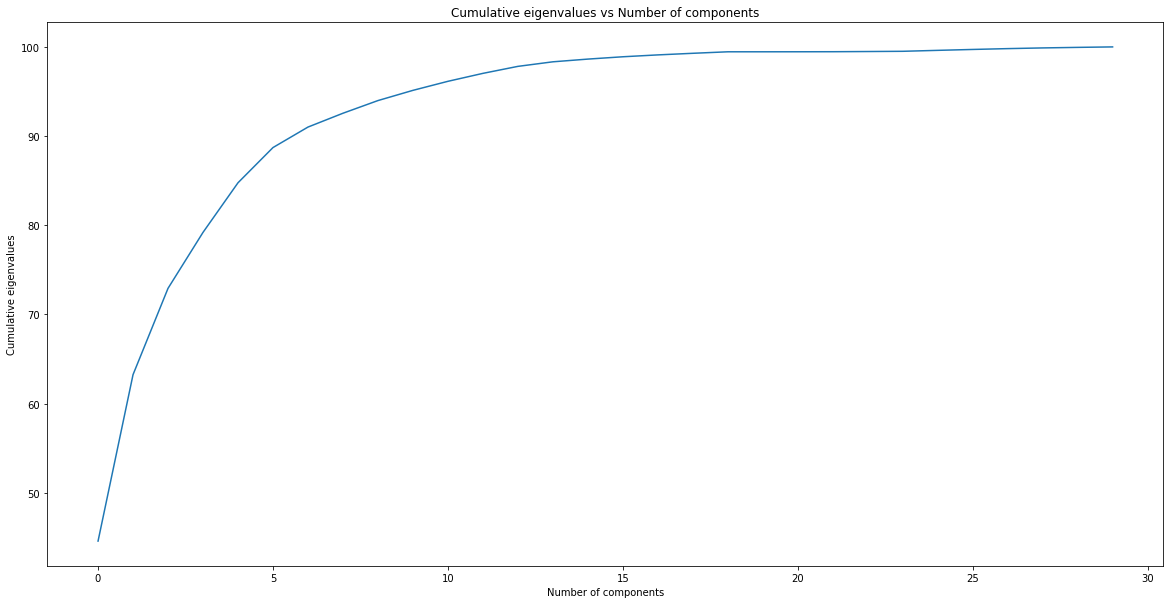

In [18]:
plt.figure(figsize=(20,10))
plt.plot(range(len(eigenvalues)), df['cummulative eigenvalue percent'] * 100)
plt.xlabel("Number of components")
plt.ylabel("Cumulative eigenvalues")
plt.title("Cumulative eigenvalues vs Number of components")
plt.show()

In [19]:
p_values = [2,4,8,10,20,25,30]
accuracy_list = []
for p in p_values:
  pca_train = train.dot(eigenvectors[:,:p])
  pca_test = test.dot(eigenvectors[:,:p])
  knn = KNeighborsClassifier(5).fit(pca_train, y_train)
  y_pred = knn.predict(pca_test)
  accuracy_list.append(accuracy_score(y_test, y_pred))
  if p == 10:
    test_report = pca_test
    test_report.columns = test.columns[:10]
    test_report['Ground Truth Output'] = y_test
    test_report['Actual Output'] = y_pred
    test_report.to_csv(r'test_output_std.csv', index = False)
  print("Accuracy of KNN when p = ", p, "->", accuracy_list[len(accuracy_list) - 1])

Accuracy of KNN when p =  2 -> 0.9855072463768116
Accuracy of KNN when p =  4 -> 0.9420289855072463
Accuracy of KNN when p =  8 -> 0.9420289855072463
Accuracy of KNN when p =  10 -> 0.9420289855072463
Accuracy of KNN when p =  20 -> 0.9565217391304348
Accuracy of KNN when p =  25 -> 0.9565217391304348
Accuracy of KNN when p =  30 -> 0.9710144927536232


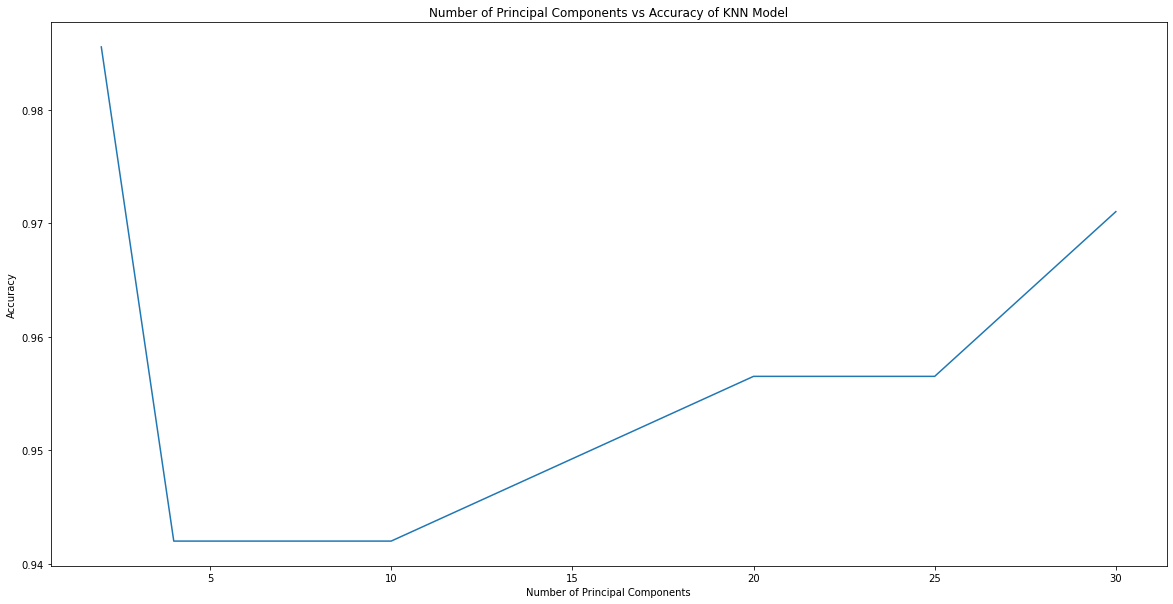

In [20]:
# Plotting Number of Principal Components vs Accuracy of the KNN Model
plt.figure(figsize=(20,10))
plt.plot(p_values, accuracy_list)
plt.ylabel("Accuracy")
plt.xlabel("Number of Principal Components")
plt.title("Number of Principal Components vs Accuracy of KNN Model")
plt.show()